# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan_approval_dataset.csv')
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
for i in loan.columns:
    print(loan[i].value_counts())

1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: loan_id, Length: 4269, dtype: int64
4    752
3    727
0    712
2    708
1    697
5    673
Name:  no_of_dependents, dtype: int64
 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64
 Yes    2150
 No     2119
Name:  self_employed, dtype: int64
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name:  income_annum, Length: 98, dtype: int64
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name:  loan_amount, Length: 378, dtype: int64
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name:  loan_term, dtype: int64
348    16
543    15
538    15
778    14
509    14
       ..
334     2
773     

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loan.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
loan.shape

(4269, 13)

<Axes: xlabel=' education', ylabel='count'>

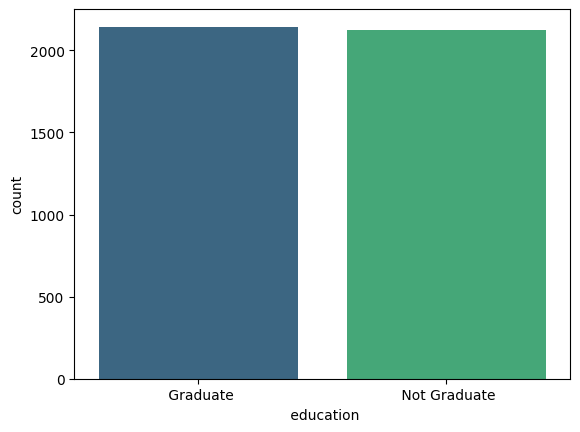

In [7]:
sns.countplot(x=loan[' education'],palette='viridis')

<Axes: xlabel=' self_employed', ylabel='count'>

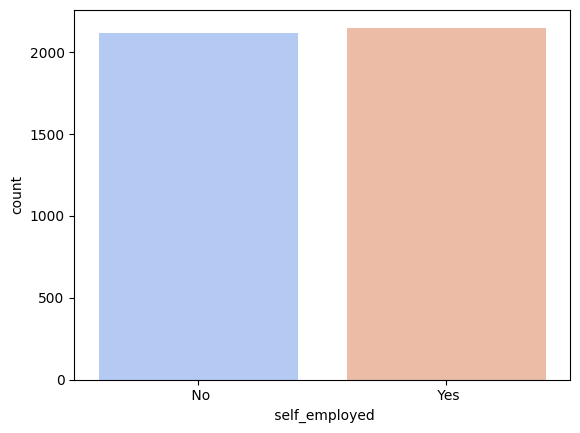

In [8]:
sns.countplot(x=loan[' self_employed'],palette='coolwarm')

<Axes: xlabel=' income_annum', ylabel='Count'>

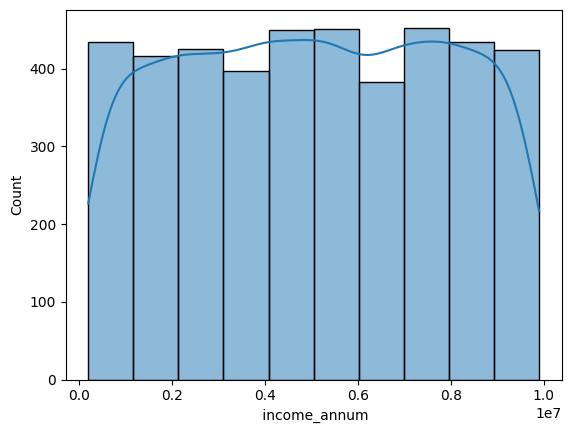

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.histplot(x=loan[' income_annum'],bins=10,kde=True)

<Axes: xlabel='Loan amount', ylabel='Count'>

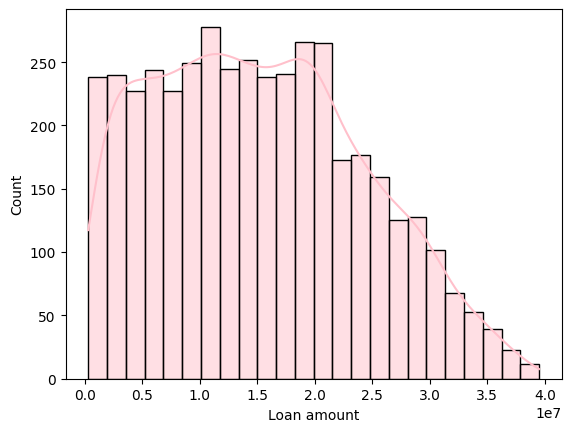

In [10]:
plt.xlabel('Loan amount')
sns.histplot(x=loan[' loan_amount'],color='pink',kde=True)

<Axes: xlabel=' self_employed', ylabel=' income_annum'>

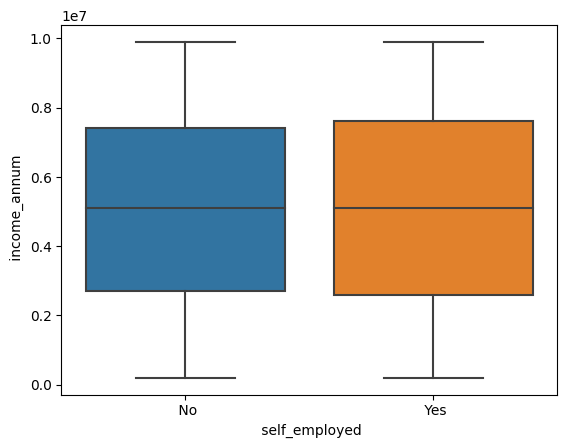

In [11]:
sns.boxplot(x=loan[' self_employed'],y=loan[' income_annum'])

<Axes: xlabel=' income_annum', ylabel=' loan_term'>

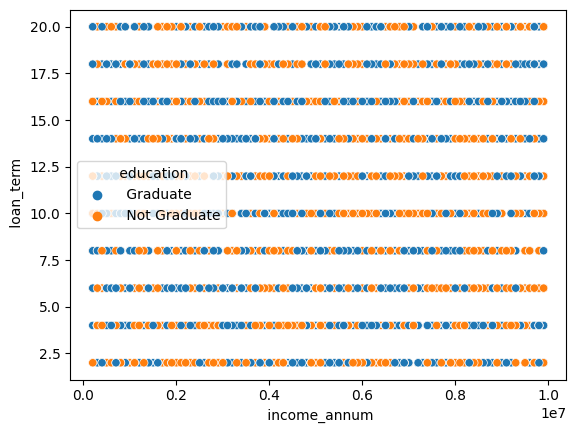

In [12]:
sns.scatterplot(y=loan[' loan_term'],x=loan[ ' income_annum'],hue=loan[' education'])

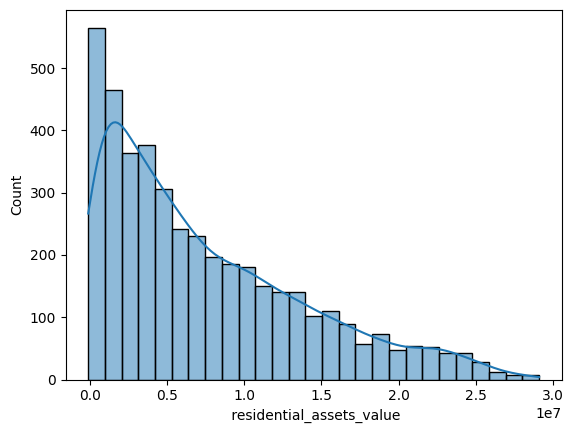

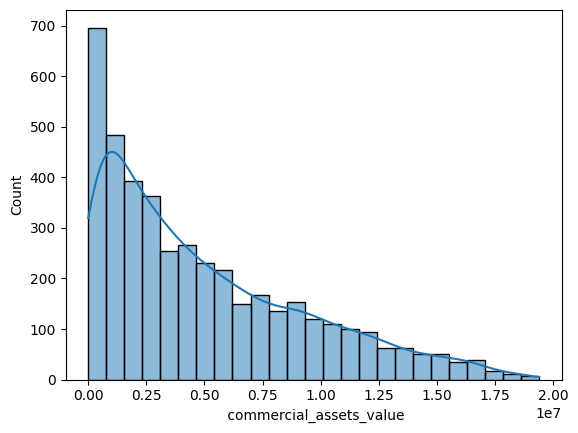

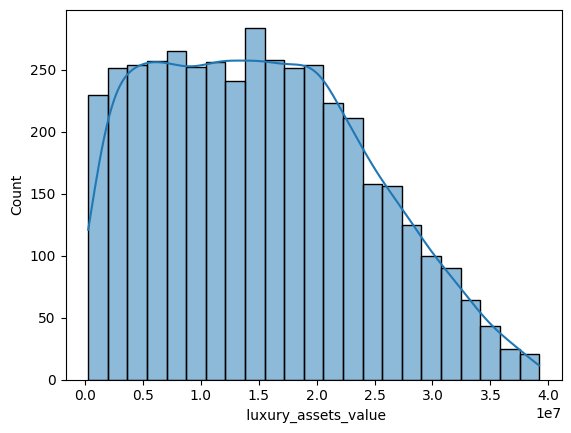

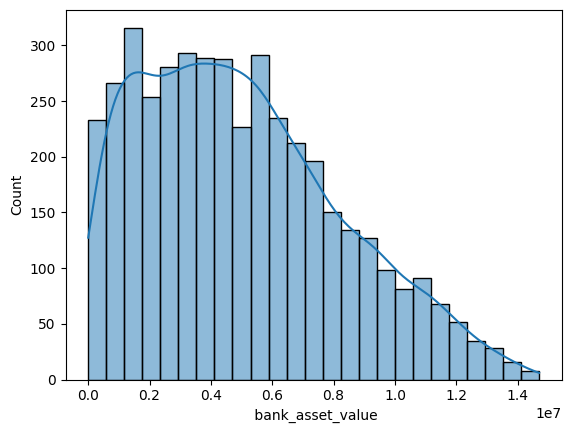

In [13]:
df=loan[[' residential_assets_value',' commercial_assets_value',	' luxury_assets_value'	,' bank_asset_value']]
for i in df:
    sns.histplot(x=loan[i],kde=True)
    plt.show()

<Axes: title={'center': 'Relation of Self employed individuals wrt to income annum and number of dependants they have to get loan approved'}, xlabel=' no_of_dependents', ylabel=' income_annum'>

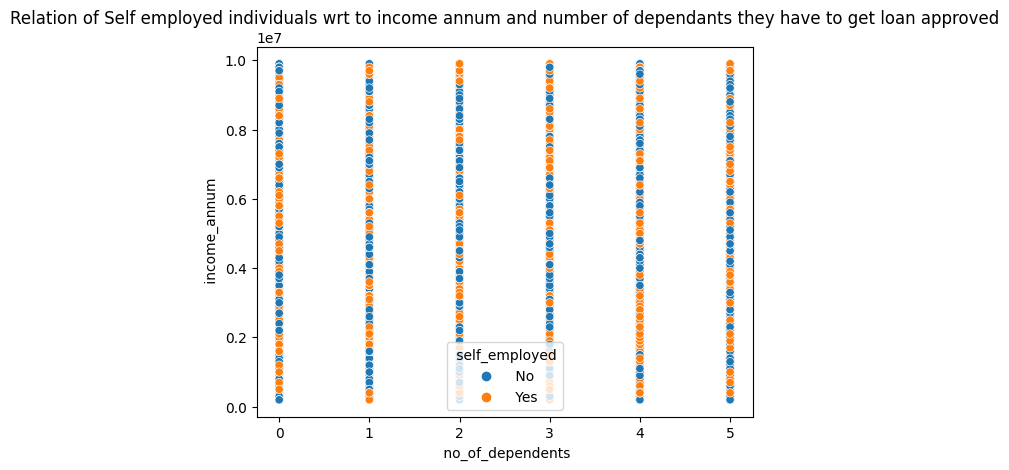

In [14]:
plt.title("Relation of Self employed individuals wrt to income annum and number of dependants they have to get loan approved")
sns.scatterplot(x=loan[' no_of_dependents'],y=loan[' income_annum'],hue=loan[' self_employed'])

<Axes: xlabel=' loan_status', ylabel='count'>

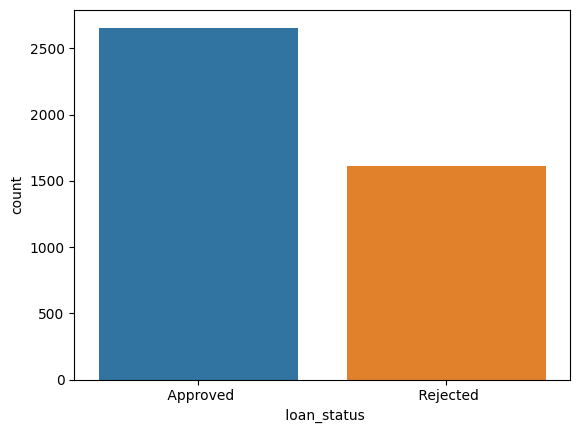

In [15]:
sns.countplot(x=loan[' loan_status'])

# Convert Categorical Variables

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
loan[' education'].dtype
loan[' education']=loan[' education'].str.strip()
loan[' education'].head()

0        Graduate
1    Not Graduate
2        Graduate
3        Graduate
4    Not Graduate
Name:  education, dtype: object

In [18]:
rank=['Graduate','Not Graduate']
oe=OrdinalEncoder(categories=[rank])
loan[' education']=oe.fit_transform(loan[[' education']])
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [19]:
loan[' self_employed']=loan[' self_employed'].str.strip()
loan[' loan_status']=loan[' loan_status'].str.strip()
self=['Yes','No']
oe=OrdinalEncoder(categories=[self])
loan[' self_employed']=oe.fit_transform(loan[[' self_employed']])
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,1.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1.0,0.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0.0,1.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0.0,1.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1.0,0.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
status=['Approved','Rejected']
oe=OrdinalEncoder(categories=[status])
loan[' loan_status']=oe.fit_transform(loan[[' loan_status']])
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,1.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,2,0,1.0,0.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,3,0.0,1.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,4,3,0.0,1.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,5,1.0,0.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


# Using different models for evaluation

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5,random_state=1)

In [22]:
loan1=loan.copy()
loan1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,1.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,2,0,1.0,0.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,3,0.0,1.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,4,3,0.0,1.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,5,1.0,0.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


In [23]:
X=loan.drop([' loan_status'],axis=1)
y=loan[' loan_status']

In [24]:
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0.0,1.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1.0,0.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0.0,1.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0.0,1.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1.0,0.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=123)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3201, 12), (1068, 12), (3201,), (1068,))

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=1)

In [28]:
y_pred=model.predict(X_test)

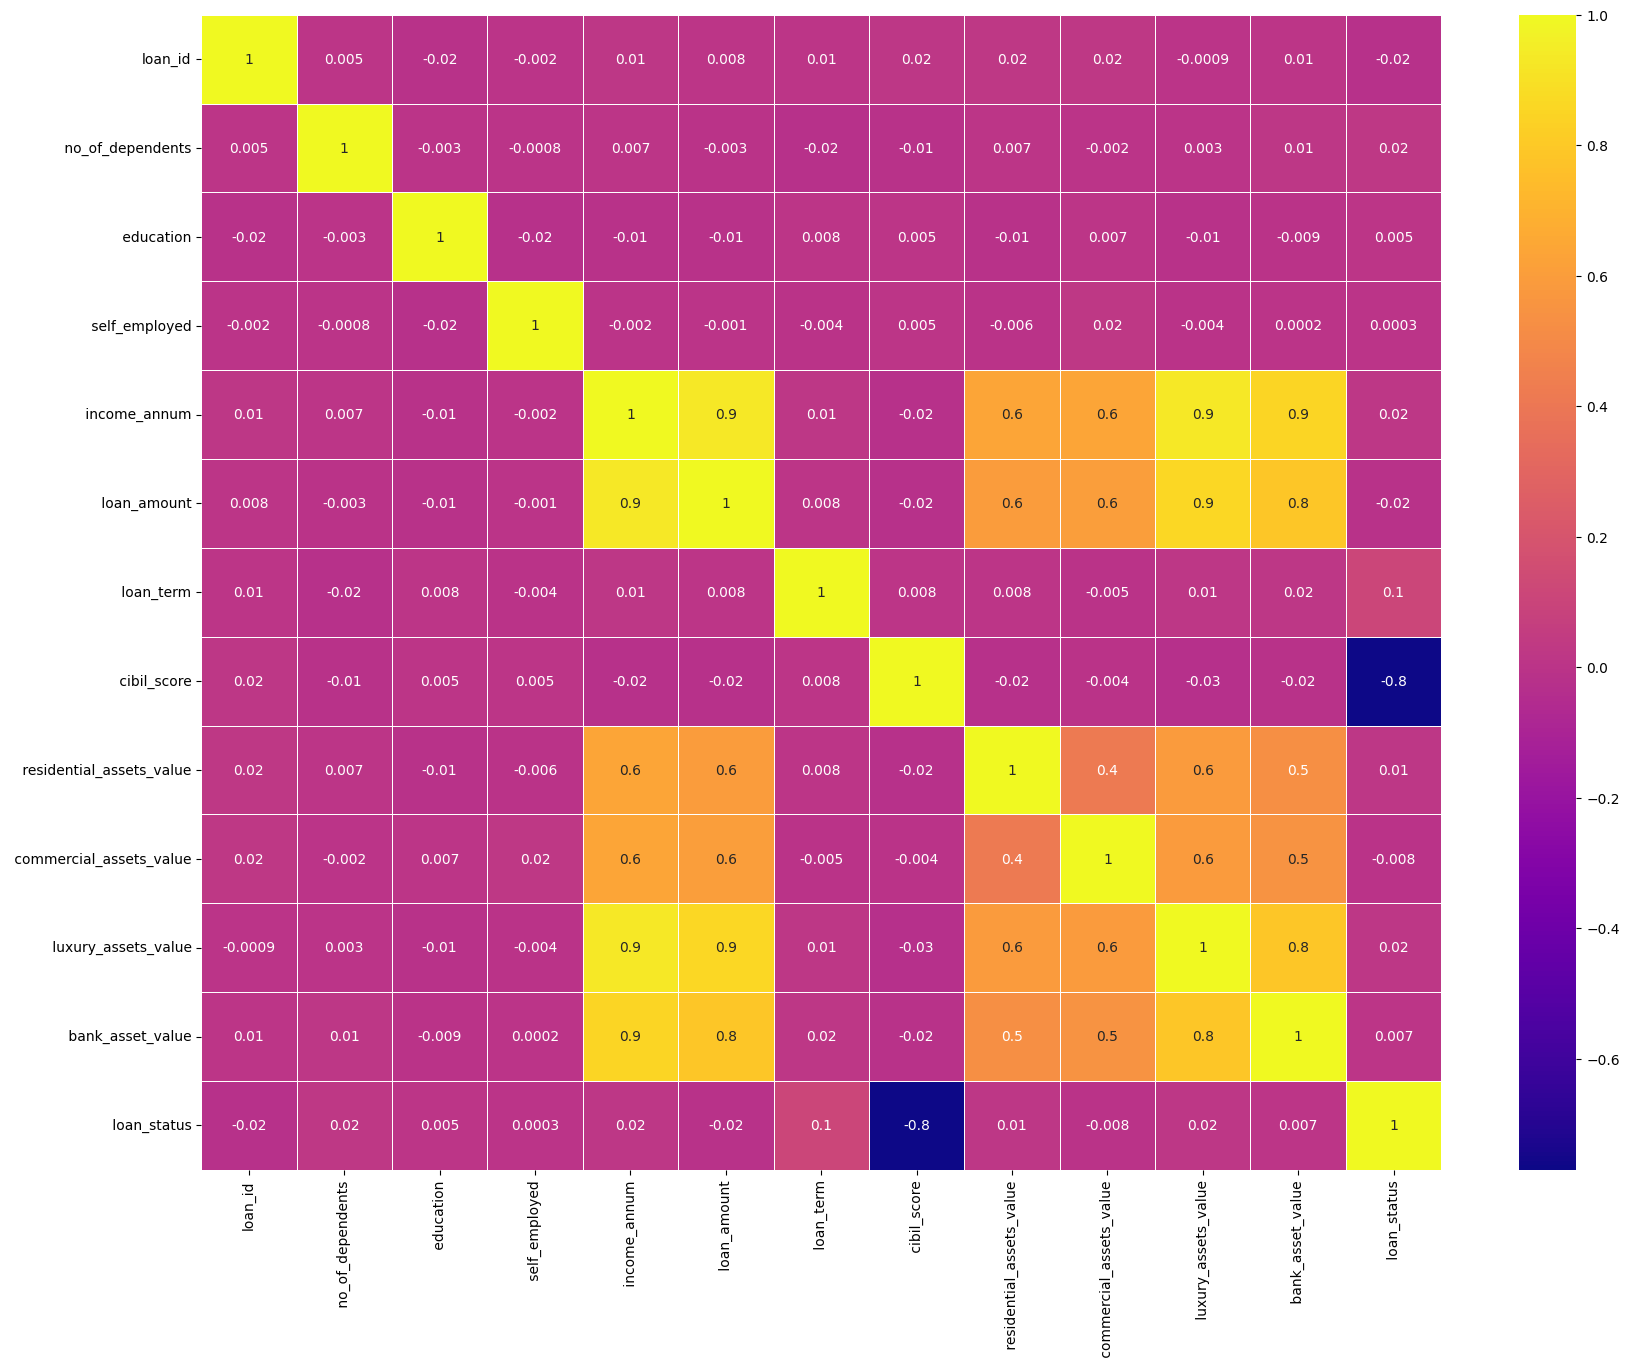

In [29]:
plt.figure(figsize=(20,15))
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
sns.heatmap(loan.corr(),annot=True,cmap='plasma',fmt='.1g',linewidths=0.5)
plt.show()

In [30]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
1933,1.0,1.0
77,0.0,0.0
1127,1.0,1.0
399,0.0,0.0
559,1.0,0.0
...,...,...
1831,0.0,0.0
834,0.0,0.0
1511,0.0,0.0
4224,0.0,0.0


In [31]:
from sklearn import tree
text_representation=tree.export_text(model)
print(text_representation)

|--- feature_7 <= 549.50
|   |--- feature_6 <= 5.00
|   |   |--- feature_5 <= 27500000.00
|   |   |   |--- feature_4 <= 8450000.00
|   |   |   |   |--- feature_5 <= 18550000.00
|   |   |   |   |   |--- feature_4 <= 5550000.00
|   |   |   |   |   |   |--- feature_5 <= 15000000.00
|   |   |   |   |   |   |   |--- feature_4 <= 3850000.00
|   |   |   |   |   |   |   |   |--- feature_5 <= 10400000.00
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 6550000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- feature_10 >  6550000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_5 >  10400000.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_4 >  3850000.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 1166.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_0 >  1166.50
|   |   |   |   | 

In [32]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
print("Training Score:",model.score(X_train,y_train)*100)
print("Testing Score:",model.score(X_test,y_test)*100)


Accuracy Score: 96.91011235955057
Training Score: 98.78163074039362
Testing Score: 96.91011235955057


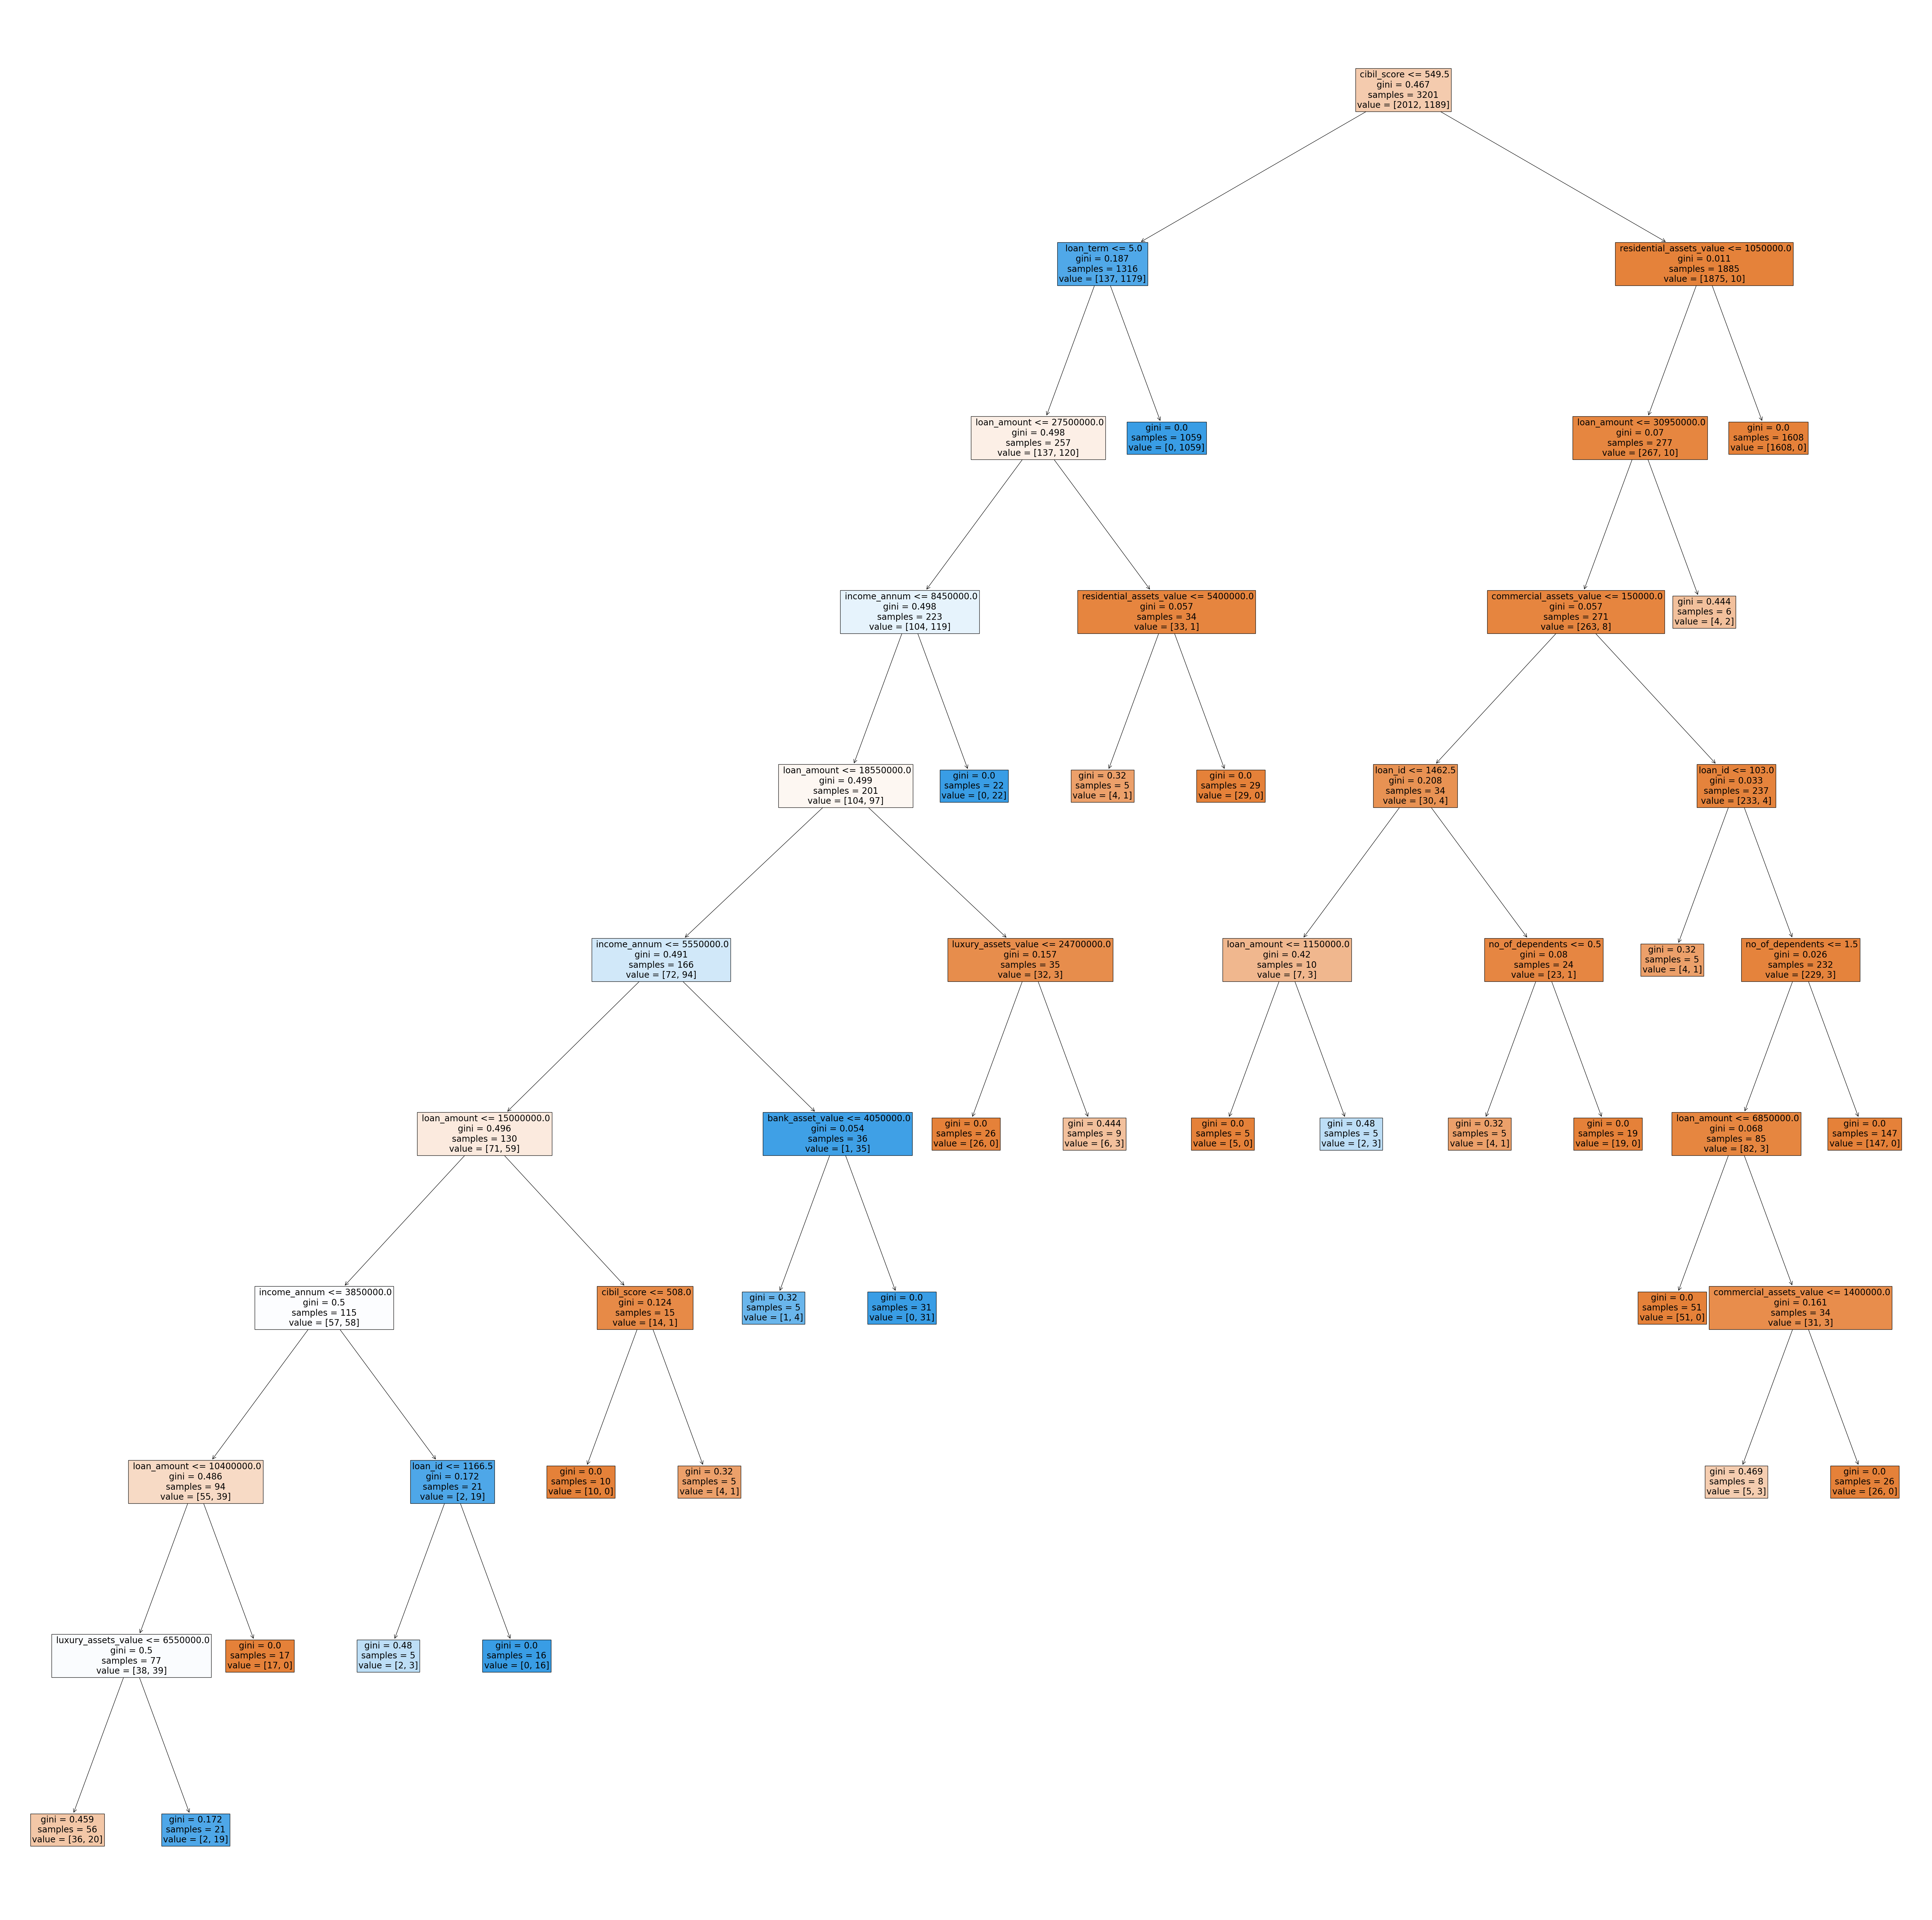

In [33]:
fig=plt.figure(figsize=(80,80))
from sklearn.tree import plot_tree
plot_tree(model,fontsize=20,filled=True,feature_names=X.columns.tolist())
plt.show()

In [34]:
fig.savefig("decision_tree.png")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       644
         1.0       0.97      0.95      0.96       424

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068



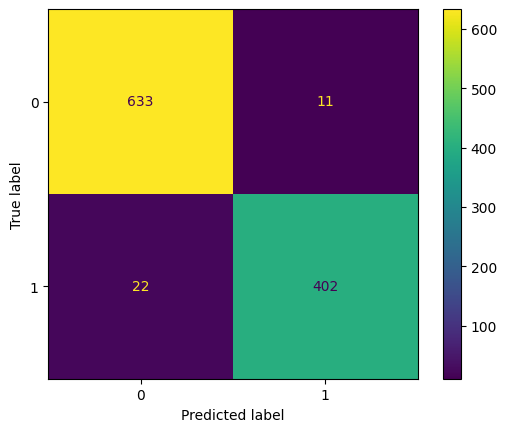

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Installing Xgboost

In [ ]:
pip install xgboost

In [37]:

from xgboost import XGBClassifier
model1=XGBClassifier(n_estimators=100,use_label_encoder=False,eval_metric='mlogloss')


In [38]:
model1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [39]:
y_pred1=model.predict(X_test)

In [43]:

print("Accuracy Score:",accuracy_score(y_test,y_pred1)*100)
print("Training Score:",model.score(X_train,y_train)*100)
print("Testing Score:",model.score(X_test,y_test)*100)


Accuracy Score: 96.91011235955057
Training Score: 98.78163074039362
Testing Score: 96.91011235955057


In [44]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       644
         1.0       0.97      0.95      0.96       424

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068



In [45]:
confusion_matrix(y_test,y_pred1)

array([[633,  11],
       [ 22, 402]], dtype=int64)